# Support Vector Machines

We wil implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from `NumPy`, we would need to take the help of `SciPy` for solving the quadratic programming problem.

## Hard-Margin SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1])

### Problem-1

$\mathbf{X}$ is a data-matrix of shape $(d, n)$. $\mathbf{y}$ is a vector of labels of size $(n, )$. What is the value of $n$ and $d$?

In [3]:
### Solution ###
X.shape

(2, 20)

### Problem-2

Visualize the dataset given to you using a scatter plot. Colour points which belong to class $+1$ $\color{green}{\text{green}}$ and those that belong to $-1$ $\color{red}{\text{red}}$. Inspect the data visually and determine its linear separability.

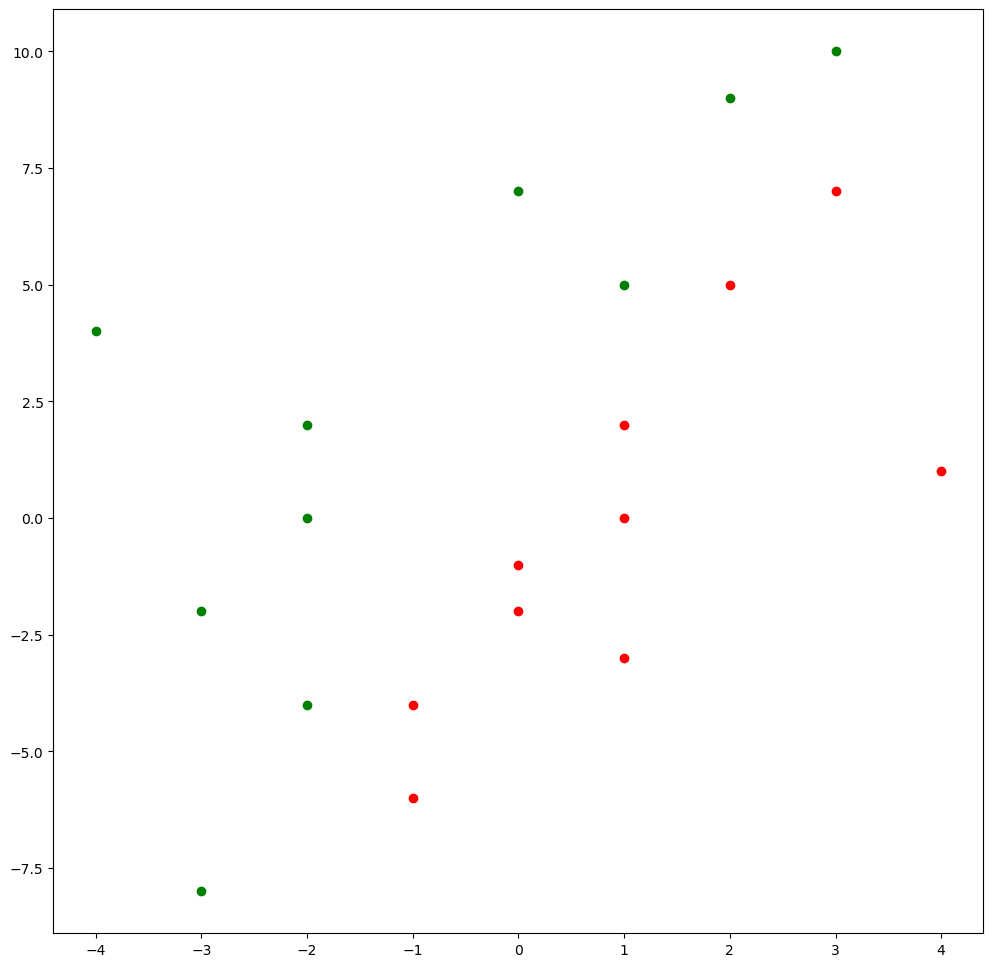

In [4]:
### Solution ###
plt.scatter(X[0, y==1], X[1, y==1], c="red")
plt.scatter(X[0, y==-1], X[1, y==-1], c="green")
plt.show()

### Problem-3

Compute the object $\mathbf{Y}$ that appears in the dual problem. What kind of an object is $\mathbf{Y}$?

In [5]:
### Solution ###
Y = np.diag(y)
Y.shape

(20, 20)

### Problem-4

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is of the form:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$



Compute the matrix $\mathbf{Q}$ for this problem and find the sum of its elements. What properties does the matrix $\mathbf{Q}$ have? What is the nature of the objective function?

In [6]:
### Solution ###
Q = Y.T@X.T@X@Y
np.sum(Q)

976

In [7]:
Q.shape

(20, 20)

### Problem-5

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

<hr>

Write a function `loss` that returns the value of objective function $f(\boldsymbol{\alpha})$ for argument $\boldsymbol{\alpha}$. Compute the value of `loss` at $\boldsymbol{\alpha} = \mathbf{1}$.

**Note**: The reason for naming the function `loss` is that we will be using `SciPy`'s `scipy.optimize.minize` routine.

In [8]:
### Solution ###
alp = np.ones((20, 1))

def loss(alp):
    return ((1/2)*alp.T@Q@alp - np.sum(alp)).sum()

In [9]:
loss(alp)

468.0

### Problem-6

Write a function named `jac` that computes the gradient, $\nabla f(\boldsymbol{\alpha})$, given $\boldsymbol{\alpha}$ as argument. Compute the value of `jac` at $\boldsymbol{\alpha} = \mathbf{1}$ and print the sum of the components of the gradient vector.

**Note**: `jac` stands for Jacobian. In our case, we don't have a vector valued function. So, this will just be the gradient.

In [10]:
### Solution ###
def jac(alp):
    return ((Y.T@X.T@X@Y)@alp - 1).reshape((-1,))

In [11]:
jac(alp).shape

(20,)

### Problem-7

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Go through this [document](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to understand how `scipy.optimize.minimize` works. Few pointers:

(1)  You should pass five arguments to `scipy.optimize.minimize`: `loss`, `jac`, `alpha_init`, `method`, `Bounds`

(2) Use the method `SLSQP`. You can treat this as a black-box.

(3) Set the initial value of `alpha_init` to zero.

(4) Use `scipy.optimize.Bounds` to trigger the $\boldsymbol{\alpha} \geq 0$ constraint.

Compute the sum of components of the optimal solution, $\boldsymbol{\alpha}^*$. Enter the nearest integer as your answer.

In [12]:
import scipy

In [13]:
### Solution ###
alpha_init = np.zeros((20, 1))

alp_star = scipy.optimize.minimize(loss, alpha_init, jac=jac, method='SLSQP', bounds=scipy.optimize.Bounds(lb=0, ub=np.inf))

/tmp/ipykernel_58718/934129714.py:4: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  alp_star = scipy.optimize.minimize(loss, alpha_init, jac=jac, method='SLSQP', bounds=scipy.optimize.Bounds(lb=0, ub=np.inf))


In [14]:
np.sum(alp_star.x)

9.999991235176768

### Problem-8

Find all the support vectors. Print the indices (zero-indexing) in the data-matrix where these support vectors are found.

In [15]:
### Solution ###
req = alp_star.x
ind = np.where(req>0.1)
ind

(array([ 6,  7,  8,  9, 18, 19]),)

### Problem-9

Find the optimal weight vector $\mathbf{w}^*$. Round each component of the optimal weight vector to the nearest integer.

In [17]:
### Solution ###
w = np.zeros(2)

for i in range(20):
    w += req[i] * X[:, i] * Y[i][i]

### Problem-10

Plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot. How many red points lie on the supporting hyperplanes? How many green points lie on the supporting hyperplanes?

In [47]:
x = np.linspace(-4,4,5)

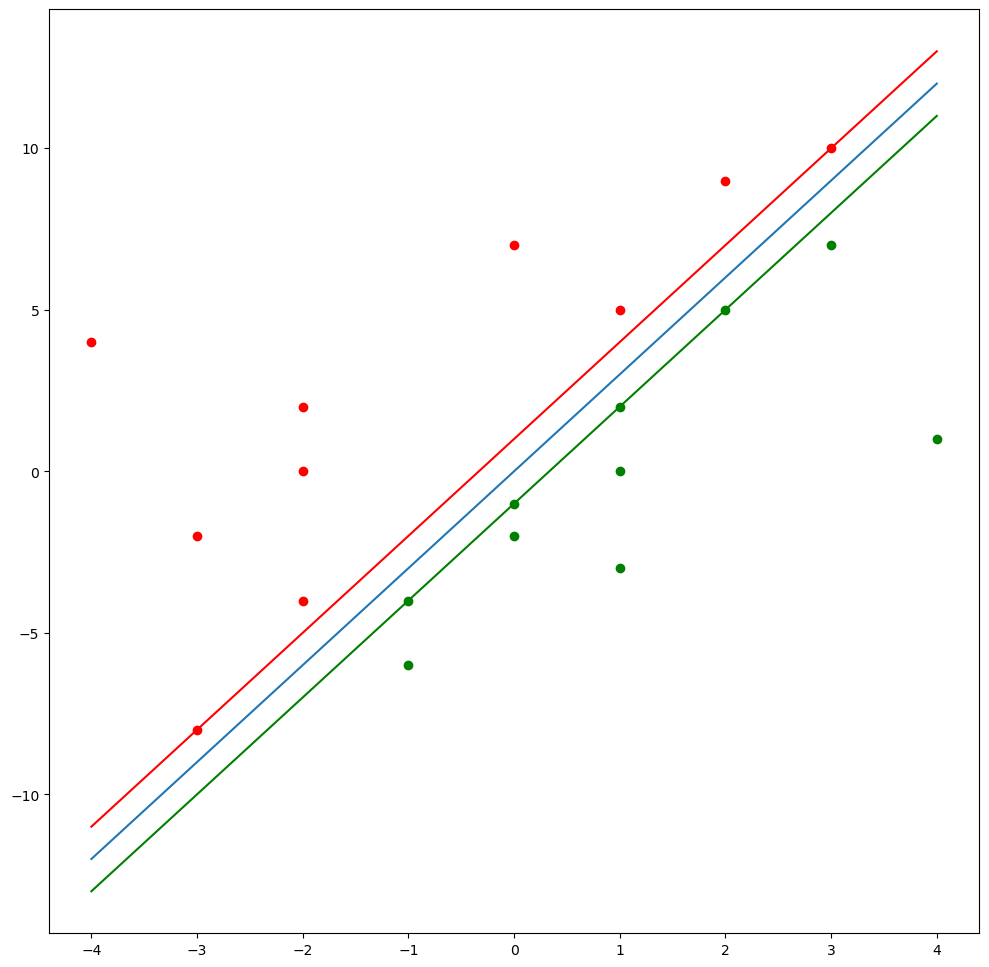

In [48]:
plt.plot(x, -w[0]/w[1]*x)
plt.plot(x, -w[0]/w[1]*x + 1, c="red")
plt.plot(x, -w[0]/w[1]*x + -1, c="green")
plt.scatter(X[0, y==1], X[1, y==1], c="green")
plt.scatter(X[0, y==-1], X[1, y==-1], c="red")
plt.show()

## Soft-margin SVM

We now turn to soft-margin SVMs. Adapt the hard-margin code that you have written for the soft-margin problem. The only change you have to make is to introduce an upper bound for $\boldsymbol{\alpha}$, which is the hyperparameter $C$.


In [41]:
### Solution ###
C = [0.01, 0.1, 1, 10]

### Problem-11

Plot the decision boundary and the supporting hyperplane for the following values of $C$.

(1) $C = 0.01$

(2) $C = 0.1$

(3) $C = 1$

(4) $C = 10$

Plot all of them in a $2 \times 2$ subplot. Study the tradeoff between the following quantities:

(1) Width of the margin.

(2) Number of points that lie within the margin or on the wrong side. This is often called **margin violation**.


/tmp/ipykernel_58718/603186072.py:6: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  alp_star = scipy.optimize.minimize(loss, alpha_init, jac=jac, method='SLSQP', bounds=scipy.optimize.Bounds(lb=0, ub=C[j]))


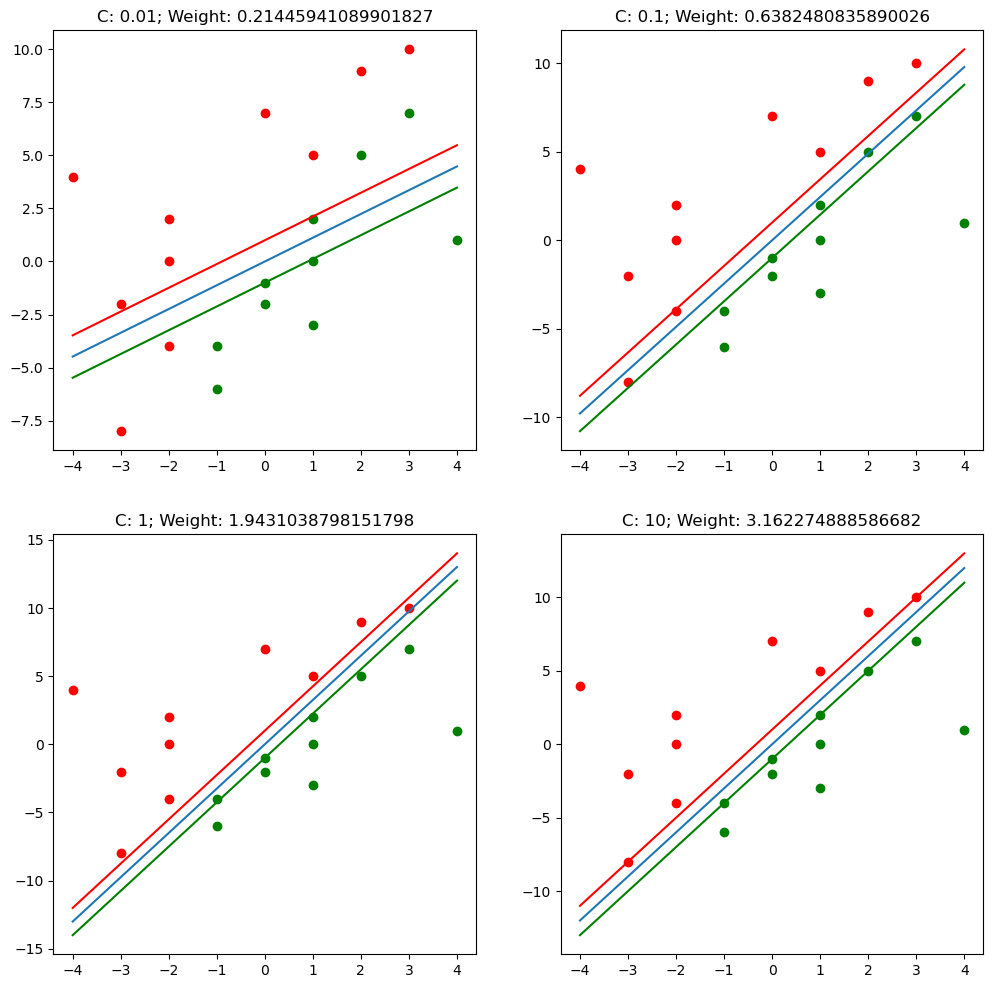

In [56]:
### Solution ###
fig, axs = plt.subplots(2, 2)

for j in range(len(C)):
    alpha_init = np.zeros((20, 1))
    alp_star = scipy.optimize.minimize(loss, alpha_init, jac=jac, method='SLSQP', bounds=scipy.optimize.Bounds(lb=0, ub=C[j]))

    req = alp_star.x
    w = np.zeros(2)
    for i in range(20):
        w += req[i] * X[:, i] * Y[i][i]
        
    if j < 2:
        axs[0, j%2].plot(x, -w[0]/w[1]*x)
        axs[0, j%2].plot(x, -w[0]/w[1]*x + 1, c="red")
        axs[0, j%2].plot(x, -w[0]/w[1]*x + -1, c="green")
        axs[0, j%2].scatter(X[0, y==1], X[1, y==1], c="green")
        axs[0, j%2].scatter(X[0, y==-1], X[1, y==-1], c="red")
        axs[0, j%2].set_title("C: " + str(C[j]) + "; Weight: " + str(np.linalg.norm(w)))
    else:
        axs[1, j%2].plot(x, -w[0]/w[1]*x)
        axs[1, j%2].plot(x, -w[0]/w[1]*x + 1, c="red")
        axs[1, j%2].plot(x, -w[0]/w[1]*x + -1, c="green")
        axs[1, j%2].scatter(X[0, y==1], X[1, y==1], c="green")
        axs[1, j%2].scatter(X[0, y==-1], X[1, y==-1], c="red")
        axs[1, j%2].set_title("C: " + str(C[j]) + "; Weight: " + str(np.linalg.norm(w)))
        
# plt.subplots_adjust(wspace=0.3, hspace=0.3)

# display the plot
plt.show()

### Problem-12

For $C = 10$, how many support vectors does the model have? Observe where these points lie. Does this observation tally with your understanding of the last few minutes of the soft-SVM lecture where professor summarizes the relationship between $\alpha^{*}$ and the supporting hyperplanes?

In [53]:
### Solution ###
req == 10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

### Problem-13

For $C = 10$, find the most critical support vectors, that is, those points for which $\alpha^{*}_i = C$.

In [ ]:
### Solution ###